# Set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
log_data = pd.read_excel(r'Master_session_log_template.xlsx', skiprows=14)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import six

def render_mpl_table(data, filesave=None, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    ax.figure.savefig(str(filesave), bbox_inches='tight')
    return ax

In [3]:
log_data = log_data[log_data.columns.drop(list(log_data.filter(regex='Unnamed')))]
log_data.head()

,Analyst ID,Name,Phone Model,Location,VPN?,Session Number,Date (D/M/Y),Session Duration,Game,Nudge Time (HH:MM:SS),...,Did you Purchase?,IAP Stacked reward,AD Format:,AD type,Watched,If Rewarded? Type?,AD Stacked Rewards (Y/N),Advertiser,Notes/Comments,Link to Recording
0,2,Solomon,Android,Singapore,no,1,15/05/2020,00:11:37,Word Stack,00:00:04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Solomon,Android,Singapore,no,1,15/05/2020,00:11:37,Word Stack,00:00:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Solomon,Android,Singapore,no,1,15/05/2020,00:11:37,Word Stack,00:00:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Solomon,Android,Singapore,no,1,15/05/2020,00:11:37,Word Stack,00:00:32,...,NaN,NaN,Rewarded,Static,y,In-game Currency,NaN,Word Stack,NaN,NaN
4,2,Solomon,Android,Singapore,no,1,15/05/2020,00:11:37,Word Stack,00:00:35,...,NaN,NaN,Rewarded,Video,y,In-game Currency,NaN,Word Jump,NaN,NaN


In [4]:
game = str(log_data['Game'][0])
game

'Word Stack'

# Internal SME

In [5]:
from datetime import datetime, timedelta


###Split the ad design score into rewarded, interstitial, banner score! --> If I only care about some 
###The green one may not be needed 
###Organize
###Split ad type
###Ad display he wont know



#explore renaming
sme_ad_occurence_ad = 20 #by a specific timeframe/per mins
sme_banner_occurence_ad = 7
sme_interstitial_occurence_ad = 7
sme_rewarded_occurence_ad = 7
sme_ad_velocity_ad = 30
sme_banner_velocity_ad = 30
sme_interstitial_velocity_ad = 30
sme_rewarded_velocity_ad = 30
sme_ad_proactiveness_ad = 0.5
sme_banner_proactiveness_ad = 0.5
sme_interstitial_proactiveness_ad = 0.5
sme_rewarded_proactiveness_ad = 0.5
sme_ad_variety_score_ad = 1
sme_ad_placement_variety_score_ad = 1
sme_time_to_first_ad_ad = 30
sme_time_to_first_banner_ad = 15
sme_time_to_first_interstitial_ad = 30
sme_time_to_first_rewarded_ad = 15
sme_rv_rewards_stacked_ad = 0.5
#Ad penetration (DAV(Daily Active Viewers)/DAU(Daily Active Users))

sme_ad_occurence_iap = 20
sme_banner_occurence_iap = 7
sme_interstitial_occurence_iap = 7
sme_rewarded_occurence_iap = 7
sme_ad_velocity_iap = 30
sme_banner_velocity_iap = 30
sme_interstitial_velocity_iap = 30
sme_rewarded_velocity_iap = 30
sme_ad_proactiveness_iap = 0.5
sme_banner_proactiveness_iap = 0.5
sme_interstitial_proactiveness_iap = 0.5
sme_rewarded_proactiveness_iap = 0.5
sme_ad_variety_score_iap = 1
sme_ad_placement_variety_score_iap = 1
sme_time_to_first_ad_iap = 30
sme_time_to_first_banner_iap = 15
sme_time_to_first_interstitial_iap = 30
sme_time_to_first_rewarded_iap = 15
sme_rv_rewards_stacked_iap = 0.5

# Macro Metrics

In [6]:
log_data.columns

Index(['Analyst ID', 'Name', 'Phone Model', 'Location', 'VPN?',
       'Session Number', 'Date (D/M/Y)', 'Session Duration', 'Game',
       'Nudge Time (HH:MM:SS)', 'Start Type', 'Location in game', 'Game Push',
       'Gift', 'What is Gifted', 'Gift Stacked reward', 'IAP Type',
       'IAP Purchased With?', 'What was for sale?', 'Did you Purchase?',
       'IAP Stacked reward', 'AD Format:', 'AD type', 'Watched ',
       'If Rewarded? Type?', 'AD Stacked Rewards (Y/N)', 'Advertiser',
       'Notes/Comments', 'Link to Recording'],
      dtype='object')

In [7]:
ad_cols = ['Banner', 'Interstitial', 'Rewarded']

ad_variety_score = log_data['AD Format:'].nunique()/len(ad_cols)
ad_variety_score

0.6666666666666666

In [8]:
game_location_cols = ['AD', 'App Start', 'Death/Mission', 'Game Pause', 'Game Play', 'Game Store', 'Level End', 'Load Screen',
                     'Menu', 'Other']

ad_placement_variety_score = log_data[log_data['AD Format:'].notnull()]['Location in game'].nunique()/len(game_location_cols)
ad_placement_variety_score

0.2

In [9]:
if log_data['AD Format:'].count()/log_data['Start Type'].count() > 0.5:
    monetization_strategy = 'AD Focused'
else:
    monetization_strategy = 'IAP Focused'
monetization_strategy

'AD Focused'

# Time to first 

## Time to first ad 

In [10]:
if log_data['AD Format:'].notnull().sum():
    first_ad_index = log_data['AD Format:'].first_valid_index()
    time_to_first_ad = log_data['Nudge Time (HH:MM:SS)'][first_ad_index ]
    print(time_to_first_ad)

00:00:32


## Time to first Banner

In [11]:
if 'Banner' in log_data['AD Format:'].values: 
    first_banner = log_data[log_data['AD Format:'] == 'banner'].index[0]
    time_to_first_banner = log_data['Nudge Time (HH:MM:SS)'][first_banner]
    print(time_to_first_banner)
else:
    time_to_first_banner = np.nan
time_to_first_banner

nan

## Time to first Interstitial 

In [12]:
if 'Interstitial' in log_data['AD Format:'].values: 
    first_interstitial = log_data[log_data['AD Format:'] == 'Interstitial'].index[0]
    time_to_first_interstitial = log_data['Nudge Time (HH:MM:SS)'][first_interstitial]
else:
    time_to_first_interstitial = np.nan

## Time to first Rewarded

In [13]:
if 'Rewarded' in log_data['AD Format:'].values: 
    first_rewarded = log_data[log_data['AD Format:'] == 'Rewarded'].index[0]
    time_to_first_rewarded = log_data['Nudge Time (HH:MM:SS)'][first_rewarded]
    print(time_to_first_rewarded)
else:
    time_to_first_rewarded = np.nan

00:00:32


# Nudge Stats 

In [14]:
nudge_stats = log_data.pivot_table(index='Session Number', aggfunc='count').reset_index()
nudge_stats = nudge_stats[['Session Number', 'Start Type', 'AD Format:']]
nudge_stats

,Session Number,Start Type,AD Format:
0,1,27,26
1,2,21,15
2,3,20,13
3,4,19,11
4,5,18,16
5,6,17,12


In [15]:
log_data['Session Duration'] = pd.to_timedelta(log_data['Session Duration'].astype(str)).dt.total_seconds()

In [16]:
nudge_stats_minor1 = log_data.pivot_table(index='Session Number', columns='AD Format:', aggfunc='size').reset_index()
nudge_stats_minor1.columns = tuple(nudge_stats_minor1.columns)

nudge_stats_minor2 = log_data.pivot_table(index='Session Number', columns='AD type', aggfunc='size').reset_index()
nudge_stats_minor2.columns = tuple(nudge_stats_minor2.columns)

nudge_stats_minor3 = log_data.pivot_table(index='Session Number', aggfunc='mean')
nudge_stats_minor3 = nudge_stats_minor3[['Session Duration']].reset_index()
nudge_stats_minor3['Session Duration'] = pd.to_timedelta(nudge_stats_minor3['Session Duration'], unit='s')

nudge_stats_minor4 = log_data.groupby(['Session Number', 'AD Format:', 'Start Type']).size().unstack('Start Type').reset_index().groupby('Session Number').sum().reset_index()
nudge_stats_minor4.columns = tuple(nudge_stats_minor4.columns)

nudge_stats_minor5 = log_data.groupby(['Session Number', 'AD Format:', 'Start Type']).size().unstack(['AD Format:', 'Start Type']).reset_index()
nudge_stats_minor5.columns = nudge_stats_minor5.columns.map('_'.join).str.strip('')
nudge_stats_minor5 = nudge_stats_minor5.rename(columns={'Session Number_':'Session Number'})

nudge_stats = pd.merge(nudge_stats, nudge_stats_minor1)
nudge_stats = pd.merge(nudge_stats, nudge_stats_minor2)
nudge_stats = pd.merge(nudge_stats, nudge_stats_minor3)
nudge_stats = pd.merge(nudge_stats, nudge_stats_minor4)
nudge_stats = pd.merge(nudge_stats, nudge_stats_minor5)
nudge_stats

,Session Number,Start Type,AD Format:,Interstitial,Rewarded,Static,Video,Session Duration,Game Initiated,Player Initiated,Rewarded_Game Initiated,Rewarded_Player Initiated,Interstitial_Game Initiated
0,1,27,26,NaN,26.0,12.0,14.0,00:11:37,20.0,6.0,20.0,6.0,NaN
1,2,21,15,NaN,15.0,NaN,15.0,00:12:02,8.0,7.0,8.0,7.0,NaN
2,3,20,13,NaN,13.0,NaN,13.0,00:10:07,6.0,7.0,6.0,7.0,NaN
3,4,19,11,1.0,10.0,NaN,11.0,00:11:25,7.0,4.0,6.0,4.0,1.0
4,5,18,16,1.0,15.0,NaN,16.0,00:10:19,2.0,14.0,1.0,14.0,1.0
5,6,17,12,3.0,9.0,NaN,12.0,00:11:30,7.0,5.0,4.0,5.0,3.0


## Transformations 

In [17]:
nudge_stats

,Session Number,Start Type,AD Format:,Interstitial,Rewarded,Static,Video,Session Duration,Game Initiated,Player Initiated,Rewarded_Game Initiated,Rewarded_Player Initiated,Interstitial_Game Initiated
0,1,27,26,NaN,26.0,12.0,14.0,00:11:37,20.0,6.0,20.0,6.0,NaN
1,2,21,15,NaN,15.0,NaN,15.0,00:12:02,8.0,7.0,8.0,7.0,NaN
2,3,20,13,NaN,13.0,NaN,13.0,00:10:07,6.0,7.0,6.0,7.0,NaN
3,4,19,11,1.0,10.0,NaN,11.0,00:11:25,7.0,4.0,6.0,4.0,1.0
4,5,18,16,1.0,15.0,NaN,16.0,00:10:19,2.0,14.0,1.0,14.0,1.0
5,6,17,12,3.0,9.0,NaN,12.0,00:11:30,7.0,5.0,4.0,5.0,3.0


In [18]:
import numpy as np
nudge_ad_cols = ['Banner', 'Interstitial', 'Rewarded', 'Banner_Game Initiated', 'Interstitial_Game Initiated', 
                 'Rewarded_Game Initiated']

for col in nudge_ad_cols:
    if col not in nudge_stats.columns:
        nudge_stats[col] = np.nan
nudge_stats

,Session Number,Start Type,AD Format:,Interstitial,Rewarded,Static,Video,Session Duration,Game Initiated,Player Initiated,Rewarded_Game Initiated,Rewarded_Player Initiated,Interstitial_Game Initiated,Banner,Banner_Game Initiated
0,1,27,26,NaN,26.0,12.0,14.0,00:11:37,20.0,6.0,20.0,6.0,NaN,NaN,NaN
1,2,21,15,NaN,15.0,NaN,15.0,00:12:02,8.0,7.0,8.0,7.0,NaN,NaN,NaN
2,3,20,13,NaN,13.0,NaN,13.0,00:10:07,6.0,7.0,6.0,7.0,NaN,NaN,NaN
3,4,19,11,1.0,10.0,NaN,11.0,00:11:25,7.0,4.0,6.0,4.0,1.0,NaN,NaN
4,5,18,16,1.0,15.0,NaN,16.0,00:10:19,2.0,14.0,1.0,14.0,1.0,NaN,NaN
5,6,17,12,3.0,9.0,NaN,12.0,00:11:30,7.0,5.0,4.0,5.0,3.0,NaN,NaN


In [19]:
nudge_stats['Ad velocity'] = nudge_stats['Session Duration']/nudge_stats['AD Format:']  
nudge_stats['Banner velocity'] = nudge_stats['Session Duration']/nudge_stats['Banner']  
nudge_stats['Interstitial velocity'] = nudge_stats['Session Duration']/nudge_stats['Interstitial']
nudge_stats['Rewarded velocity'] = nudge_stats['Session Duration']/nudge_stats['Rewarded']
nudge_stats['Ad proactiveness'] = nudge_stats['Game Initiated']/nudge_stats['AD Format:']
nudge_stats['Banner proactiveness'] = nudge_stats['Banner_Game Initiated']/nudge_stats['Banner']
nudge_stats['Interstitial proactiveness'] = nudge_stats['Interstitial_Game Initiated']/nudge_stats['Interstitial']
nudge_stats['Rewarded proactiveness'] = nudge_stats['Rewarded_Game Initiated']/nudge_stats['Rewarded']

In [20]:
nudge_stats['Ad velocity'] = nudge_stats['Ad velocity'].fillna(pd.Timedelta(seconds=0))
nudge_stats['Banner velocity'] = nudge_stats['Banner velocity'].fillna(pd.Timedelta(seconds=0))
nudge_stats['Interstitial velocity'] = nudge_stats['Interstitial velocity'].fillna(pd.Timedelta(seconds=0))
nudge_stats['Rewarded velocity'] = nudge_stats['Rewarded velocity'].fillna(pd.Timedelta(seconds=0))

In [21]:
nudge_stats_plot = nudge_stats[['Ad velocity', 'Banner velocity',
       'Interstitial velocity', 'Rewarded velocity', 'Ad proactiveness',
       'Banner proactiveness', 'Interstitial proactiveness',
       'Rewarded proactiveness']]

<Figure size 432x288 with 0 Axes>

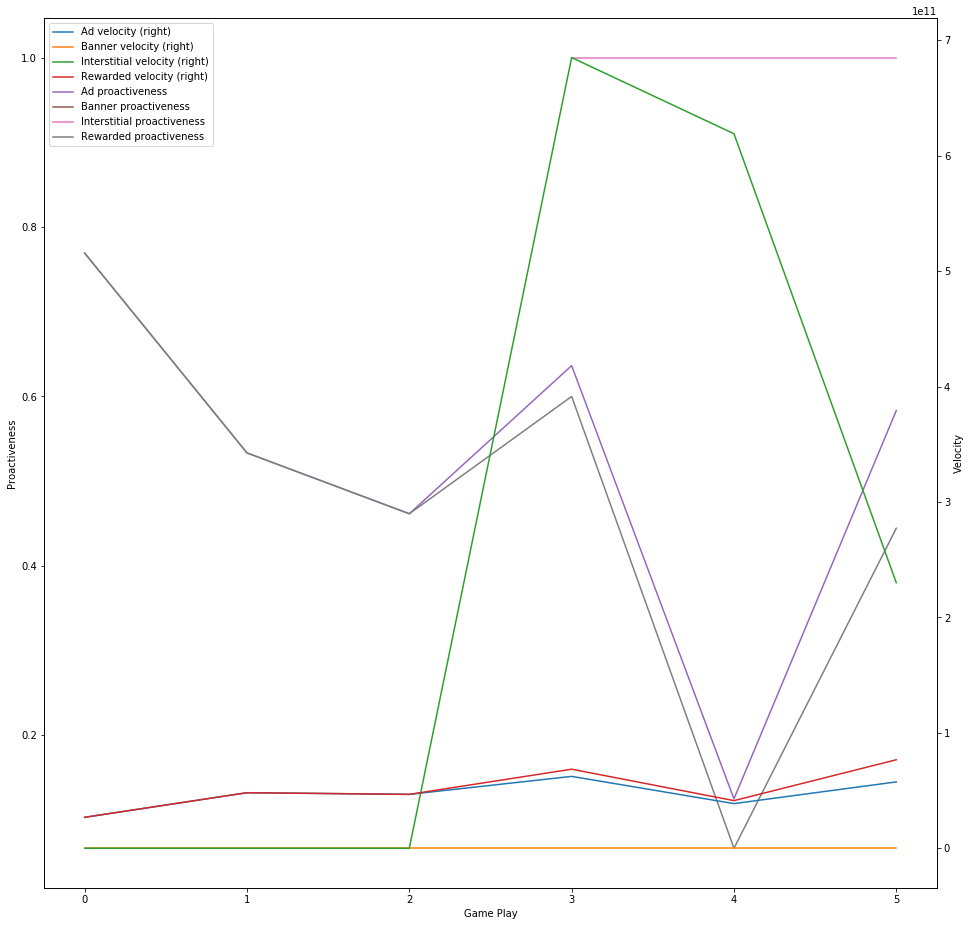

In [22]:
plt.figure()
ax = nudge_stats_plot.plot(secondary_y=['Ad velocity', 'Banner velocity', 'Interstitial velocity', 'Rewarded velocity'], 
                           figsize=(16, 16))

# nudge_stats[''].plot(secondary_y=True)
# nudge_stats['Banner velocity'].plot(secondary_y=True)
# nudge_stats['Interstitial velocity'].plot(secondary_y=True)
# nudge_stats['Rewarded velocity'].plot(secondary_y=True)
# nudge_stats['Ad nudges proactiveness'].plot()
# nudge_stats['Banner proactiveness'].plot()
# nudge_stats['Interstitial proactiveness'].plot()
# nudge_stats['Rewarded proactiveness'].plot()
ax.set_xlabel('Game Play')
ax.set_ylabel('Proactiveness')
ax.right_ax.set_ylabel('Velocity')
ax.figure.savefig('proactiveness_and_velocity_over_game.png', bbox_inches='tight')

In [23]:
nudge_stats

,Session Number,Start Type,AD Format:,Interstitial,Rewarded,Static,Video,Session Duration,Game Initiated,Player Initiated,...,Banner,Banner_Game Initiated,Ad velocity,Banner velocity,Interstitial velocity,Rewarded velocity,Ad proactiveness,Banner proactiveness,Interstitial proactiveness,Rewarded proactiveness
0,1,27,26,NaN,26.0,12.0,14.0,00:11:37,20.0,6.0,...,NaN,NaN,00:00:26.807692,0 days,00:00:00,00:00:26.807692,0.769231,NaN,NaN,0.769231
1,2,21,15,NaN,15.0,NaN,15.0,00:12:02,8.0,7.0,...,NaN,NaN,00:00:48.133333,0 days,00:00:00,00:00:48.133333,0.533333,NaN,NaN,0.533333
2,3,20,13,NaN,13.0,NaN,13.0,00:10:07,6.0,7.0,...,NaN,NaN,00:00:46.692307,0 days,00:00:00,00:00:46.692307,0.461538,NaN,NaN,0.461538
3,4,19,11,1.0,10.0,NaN,11.0,00:11:25,7.0,4.0,...,NaN,NaN,00:01:02.272727,0 days,00:11:25,00:01:08.500000,0.636364,NaN,1.0,0.600000
4,5,18,16,1.0,15.0,NaN,16.0,00:10:19,2.0,14.0,...,NaN,NaN,00:00:38.687500,0 days,00:10:19,00:00:41.266666,0.125000,NaN,1.0,0.066667
5,6,17,12,3.0,9.0,NaN,12.0,00:11:30,7.0,5.0,...,NaN,NaN,00:00:57.500000,0 days,00:03:50,00:01:16.666666,0.583333,NaN,1.0,0.444444


## Nudge Stats Variety

In [24]:
# nudge_stats.mean()
nudge_stats.loc['average'] = nudge_stats.mean()
nudge_stats.loc['variety'] = nudge_stats.std()

In [25]:
nudge_stats

,Session Number,Start Type,AD Format:,Interstitial,Rewarded,Static,Video,Session Duration,Game Initiated,Player Initiated,...,Banner,Banner_Game Initiated,Ad velocity,Banner velocity,Interstitial velocity,Rewarded velocity,Ad proactiveness,Banner proactiveness,Interstitial proactiveness,Rewarded proactiveness
0,1.000000,27.000000,26.00000,NaN,26.000000,12.0,14.000000,00:11:37,20.000000,6.000000,...,NaN,NaN,00:00:26.807692,0 days,00:00:00,00:00:26.807692,0.769231,NaN,NaN,0.769231
1,2.000000,21.000000,15.00000,NaN,15.000000,NaN,15.000000,00:12:02,8.000000,7.000000,...,NaN,NaN,00:00:48.133333,0 days,00:00:00,00:00:48.133333,0.533333,NaN,NaN,0.533333
2,3.000000,20.000000,13.00000,NaN,13.000000,NaN,13.000000,00:10:07,6.000000,7.000000,...,NaN,NaN,00:00:46.692307,0 days,00:00:00,00:00:46.692307,0.461538,NaN,NaN,0.461538
3,4.000000,19.000000,11.00000,1.000000,10.000000,NaN,11.000000,00:11:25,7.000000,4.000000,...,NaN,NaN,00:01:02.272727,0 days,00:11:25,00:01:08.500000,0.636364,NaN,1.0,0.600000
4,5.000000,18.000000,16.00000,1.000000,15.000000,NaN,16.000000,00:10:19,2.000000,14.000000,...,NaN,NaN,00:00:38.687500,0 days,00:10:19,00:00:41.266666,0.125000,NaN,1.0,0.066667
5,6.000000,17.000000,12.00000,3.000000,9.000000,NaN,12.000000,00:11:30,7.000000,5.000000,...,NaN,NaN,00:00:57.500000,0 days,00:03:50,00:01:16.666666,0.583333,NaN,1.0,0.444444
average,3.500000,20.333333,15.50000,1.666667,14.666667,12.0,13.500000,00:11:10,8.333333,7.166667,...,NaN,NaN,00:00:46.682260,0 days,00:04:15.666666,00:00:51.344444,0.518133,NaN,1.0,0.479202
variety,1.707825,3.248931,4.99166,0.942809,5.557777,0.0,1.707825,00:00:42.087211,5.557777,3.236081,...,NaN,NaN,00:00:11.698336,0 days,00:04:52.430428,00:00:16.688795,0.199694,NaN,0.0,0.213442


In [26]:
nudge_stats_averages1 = nudge_stats[['Banner', 'Interstitial', 'Rewarded']].T.reset_index()
nudge_stats_averages1

,index,0,1,2,3,4,5,average,variety
0,Banner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Interstitial,NaN,NaN,NaN,1.0,1.0,3.0,1.666667,0.942809
2,Rewarded,26.0,15.0,13.0,10.0,15.0,9.0,14.666667,5.557777


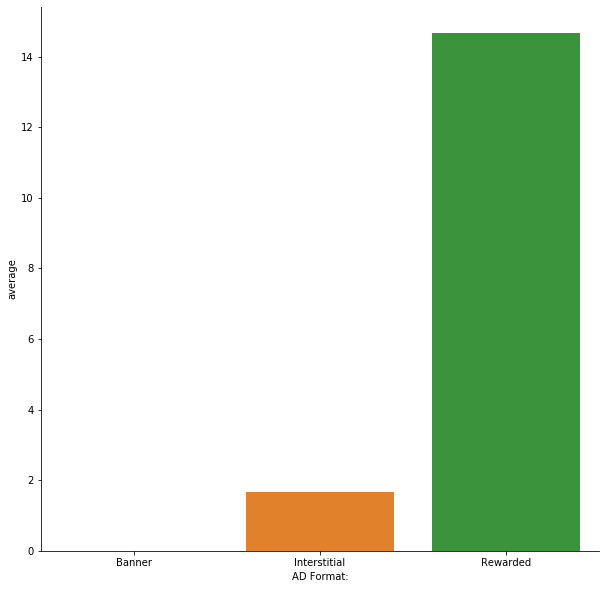

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 10))
nudge_stats_averages1 = nudge_stats_averages1.rename(columns={'index':'AD Format:'})
sns.barplot(x='AD Format:', y='average', data=nudge_stats_averages1, ax=ax1)
sns.despine(fig)
fig.savefig('Ad_average_count.png', bbox_inches='tight')

In [28]:
nudge_stats_averages2 = nudge_stats[['Static', 'Video']].T.reset_index()
nudge_stats_averages2

,index,0,1,2,3,4,5,average,variety
0,Static,12.0,NaN,NaN,NaN,NaN,NaN,12.0,0.000000
1,Video,14.0,15.0,13.0,11.0,16.0,12.0,13.5,1.707825


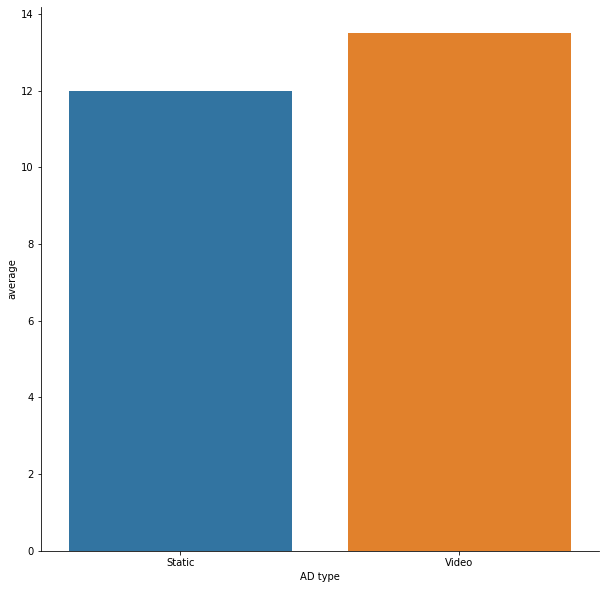

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 10))
nudge_stats_averages2 = nudge_stats_averages2.rename(columns={'index':'AD type'})
sns.barplot(x='AD type', y='average', data=nudge_stats_averages2, ax=ax1)
sns.despine(fig)
fig.savefig('Ad_type_average_count.png', bbox_inches='tight')

In [30]:
nudge_stats_averages3 = nudge_stats[['Ad velocity', 'Banner velocity', 'Interstitial velocity', 'Rewarded velocity']].T.reset_index()
nudge_stats_averages3

,index,0,1,2,3,4,5,average,variety
0,Ad velocity,00:00:26.807692,00:00:48.133333,00:00:46.692307,00:01:02.272727,00:00:38.687500,00:00:57.500000,00:00:46.682260,00:00:11.698336
1,Banner velocity,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
2,Interstitial velocity,00:00:00,00:00:00,00:00:00,00:11:25,00:10:19,00:03:50,00:04:15.666666,00:04:52.430428
3,Rewarded velocity,00:00:26.807692,00:00:48.133333,00:00:46.692307,00:01:08.500000,00:00:41.266666,00:01:16.666666,00:00:51.344444,00:00:16.688795


In [31]:
if (nudge_stats_averages3['average'] > '00:00:30').any():
    recommendated_ads_tightness = 'You can push more Ads per minute!'

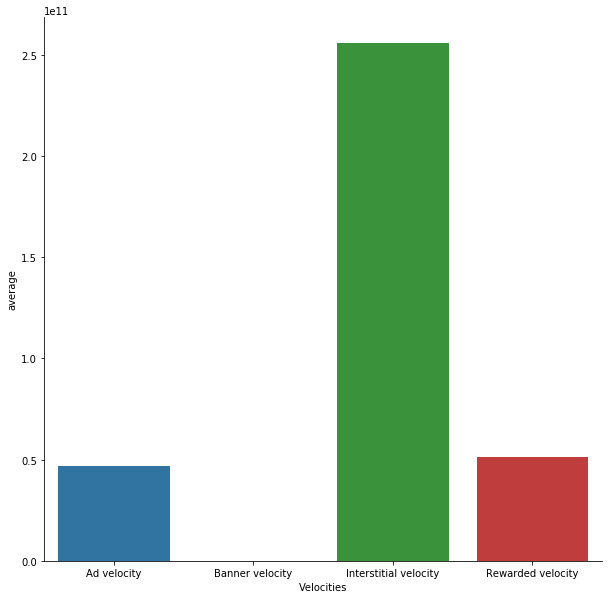

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 10))
nudge_stats_averages3 = nudge_stats_averages3.rename(columns={'index':'Velocities'})
sns.barplot(x='Velocities', y='average', data=nudge_stats_averages3, ax=ax1)
sns.despine(fig)
fig.savefig('Average_ad_velocity.png', bbox_inches='tight')

In [33]:
nudge_stats_averages4 = nudge_stats[['Ad proactiveness', 'Banner proactiveness', 'Interstitial proactiveness', 'Rewarded proactiveness']].T.reset_index()
nudge_stats_averages4

,index,0,1,2,3,4,5,average,variety
0,Ad proactiveness,0.769231,0.533333,0.461538,0.636364,0.125000,0.583333,0.518133,0.199694
1,Banner proactiveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Interstitial proactiveness,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000
3,Rewarded proactiveness,0.769231,0.533333,0.461538,0.600000,0.066667,0.444444,0.479202,0.213442


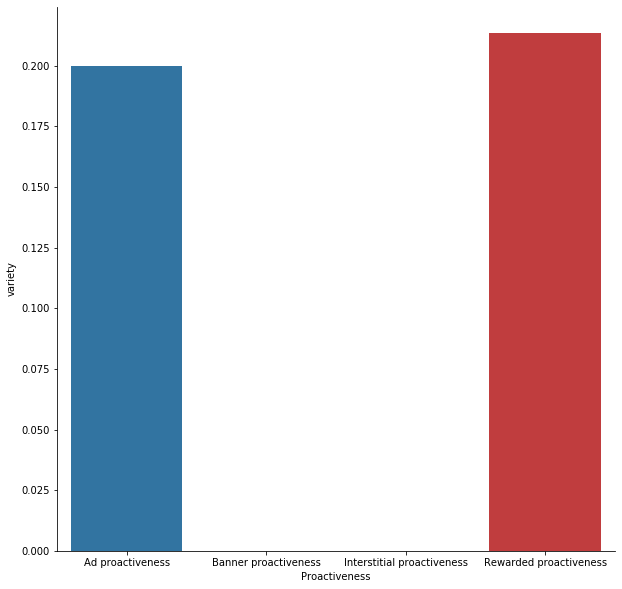

In [34]:
fig, ax1 = plt.subplots(figsize=(10, 10))
nudge_stats_averages4 = nudge_stats_averages4.rename(columns={'index':'Proactiveness'})
sns.barplot(x='Proactiveness', y='variety', data=nudge_stats_averages4, ax=ax1)
sns.despine(fig)
fig.savefig('Ad_average_proactiveness.png', bbox_inches='tight')

# Placements 

In [35]:
log_data.columns

Index(['Analyst ID', 'Name', 'Phone Model', 'Location', 'VPN?',
       'Session Number', 'Date (D/M/Y)', 'Session Duration', 'Game',
       'Nudge Time (HH:MM:SS)', 'Start Type', 'Location in game', 'Game Push',
       'Gift', 'What is Gifted', 'Gift Stacked reward', 'IAP Type',
       'IAP Purchased With?', 'What was for sale?', 'Did you Purchase?',
       'IAP Stacked reward', 'AD Format:', 'AD type', 'Watched ',
       'If Rewarded? Type?', 'AD Stacked Rewards (Y/N)', 'Advertiser',
       'Notes/Comments', 'Link to Recording'],
      dtype='object')

In [36]:
ad_placement = log_data.pivot_table(values='Nudge Time (HH:MM:SS)', index=['Session Number', 'Location in game'], columns='AD Format:', aggfunc='count').reset_index()
ad_placement.columns = tuple(ad_placement)

In [37]:
ad_placement_cols = ['Banner', 'Interstitial', 'Rewarded']

for col in ad_placement_cols:
    if col not in ad_placement.columns:
        ad_placement[col] = np.nan
ad_placement

,Session Number,Location in game,Interstitial,Rewarded,Banner
0,1,Level End,NaN,26.0,NaN
1,2,Level End,NaN,5.0,NaN
2,2,Game Pause,NaN,10.0,NaN
3,3,Level End,NaN,13.0,NaN
4,4,Level End,1.0,10.0,NaN
5,5,Level End,NaN,2.0,NaN
6,5,Game Pause,1.0,13.0,NaN
7,6,Level End,3.0,9.0,NaN


In [38]:
ad_placement.loc['variety'] = ad_placement.std()

## Placement Variety 

In [39]:
ad_placement_stack = ad_placement.set_index(['Session Number', 'Location in game']).stack().reset_index().rename(columns={0:'counts'})
ad_placement_consistency = ad_placement_stack['counts'].std()

In [40]:
ad_placement_consistency

7.059544410141214

## Placements Category 

In [41]:
ad_placement_cat = ad_placement.groupby('Location in game').mean().reset_index()

for i in game_location_cols:
    if i not in ad_placement_cat['Location in game'].values:
        ad_placement_cat = ad_placement_cat.append({'Location in game': i}, ignore_index=True)

ad_placement_cat

,Location in game,Session Number,Interstitial,Rewarded,Banner
0,Game Pause,3.5,1.0,11.500000,NaN
1,Level End,3.5,2.0,10.833333,NaN
2,AD,NaN,NaN,NaN,NaN
3,App Start,NaN,NaN,NaN,NaN
4,Death/Mission,NaN,NaN,NaN,NaN
5,Game Play,NaN,NaN,NaN,NaN
6,Game Store,NaN,NaN,NaN,NaN
7,Load Screen,NaN,NaN,NaN,NaN
8,Menu,NaN,NaN,NaN,NaN
9,Other,NaN,NaN,NaN,NaN


In [42]:
ad_placement_cat['total_ads'] = ad_placement_cat.drop('Session Number', axis=1).sum(axis=1)
ad_placement_cat = ad_placement_cat.fillna(0)
ad_placement_cat

,Location in game,Session Number,Interstitial,Rewarded,Banner,total_ads
0,Game Pause,3.5,1.0,11.500000,0.0,12.500000
1,Level End,3.5,2.0,10.833333,0.0,12.833333
2,AD,0.0,0.0,0.000000,0.0,0.000000
3,App Start,0.0,0.0,0.000000,0.0,0.000000
4,Death/Mission,0.0,0.0,0.000000,0.0,0.000000
5,Game Play,0.0,0.0,0.000000,0.0,0.000000
6,Game Store,0.0,0.0,0.000000,0.0,0.000000
7,Load Screen,0.0,0.0,0.000000,0.0,0.000000
8,Menu,0.0,0.0,0.000000,0.0,0.000000
9,Other,0.0,0.0,0.000000,0.0,0.000000


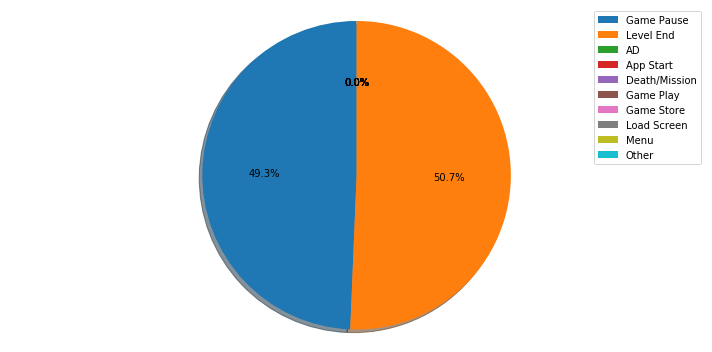

In [43]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(ad_placement_cat['total_ads'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(labels=ad_placement_cat['Location in game'], loc='best')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
fig1.savefig('Ad_placement_location_proportion.png', bbox_inches='tight')

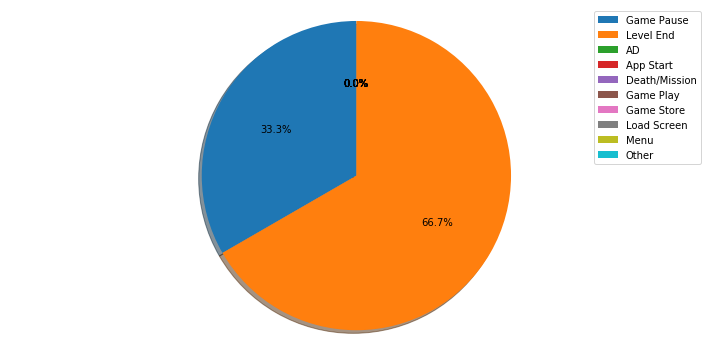

In [44]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(ad_placement_cat['Interstitial'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(labels=ad_placement_cat['Location in game'], loc='best')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
fig1.savefig('Interstitial_ad_placement_location_proportion.png', bbox_inches='tight')

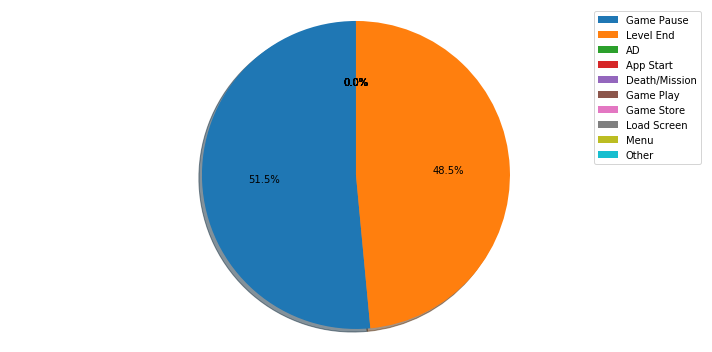

In [45]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(ad_placement_cat['Rewarded'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(labels=ad_placement_cat['Location in game'], loc='best')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
fig1.savefig('Rewarded_ad_placement_location_proportion.png', bbox_inches='tight')

# Ad Type

In [46]:
log_data.columns

Index(['Analyst ID', 'Name', 'Phone Model', 'Location', 'VPN?',
       'Session Number', 'Date (D/M/Y)', 'Session Duration', 'Game',
       'Nudge Time (HH:MM:SS)', 'Start Type', 'Location in game', 'Game Push',
       'Gift', 'What is Gifted', 'Gift Stacked reward', 'IAP Type',
       'IAP Purchased With?', 'What was for sale?', 'Did you Purchase?',
       'IAP Stacked reward', 'AD Format:', 'AD type', 'Watched ',
       'If Rewarded? Type?', 'AD Stacked Rewards (Y/N)', 'Advertiser',
       'Notes/Comments', 'Link to Recording'],
      dtype='object')

In [47]:
ad_type_distribution = log_data.pivot_table(values='Nudge Time (HH:MM:SS)', index=['Session Number', 'AD type'], columns='AD Format:', aggfunc='count').reset_index()

,AD type,Interstitial,Rewarded
0,Static,0.00,12.00
1,Video,1.67,12.67


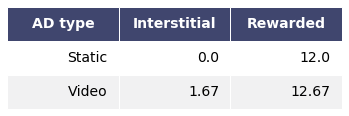

In [48]:
ad_type_distribution.columns = tuple(ad_type_distribution.columns)
ad_type_distribution = ad_type_distribution.drop('Session Number', axis=1).groupby('AD type').mean().reset_index().fillna(0).round(2)
render_mpl_table(ad_type_distribution, header_columns=0, col_width=2.0, filesave='ad_type_by_ad_format_distribution_table.png')
ad_type_distribution                 

# RV Rewards 

In [49]:
rv_rewards = log_data.pivot_table(values='Nudge Time (HH:MM:SS)', index='Session Number', columns='If Rewarded? Type?', aggfunc='count', margins=True).reset_index()
rv_rewards.columns = tuple(rv_rewards.columns)
rv_rewards

,Session Number,In-game Currency,Random Prize,All
0,1,26.0,NaN,26
1,2,5.0,10.0,15
2,3,13.0,NaN,13
3,4,10.0,NaN,10
4,5,2.0,13.0,15
5,6,9.0,NaN,9
6,All,65.0,23.0,88


In [50]:
rewards_cols = ['Faster Progression', 'Hint/Information', 'In-game Currency', 'In-game items', 'Play Time', 'Random Prize', 
               'Revive/Continue', 'Temporary Boost', 'Upgrade', 'Other']

rv_rewards_cat = log_data.pivot_table(values='Nudge Time (HH:MM:SS)', index='Session Number', columns='If Rewarded? Type?', aggfunc='count').stack().reset_index()
rv_rewards_cat = rv_rewards_cat.drop('Session Number', axis=1).groupby('If Rewarded? Type?').mean().reset_index()

if len(rv_rewards_cat) < 5:
    recommended_more_rewards = 'You can show more RV for more in-game rewards at more locations!'

for i in rewards_cols:
    if i not in rv_rewards_cat['If Rewarded? Type?'].values:
        rv_rewards_cat = rv_rewards_cat.append({'If Rewarded? Type?': i}, ignore_index=True)

rv_rewards_cat = rv_rewards_cat.fillna(0)
rv_rewards_cat

,If Rewarded? Type?,0
0,In-game Currency,10.833333
1,Random Prize,11.500000
2,Faster Progression,0.000000
3,Hint/Information,0.000000
4,In-game items,0.000000
5,Play Time,0.000000
6,Revive/Continue,0.000000
7,Temporary Boost,0.000000
8,Upgrade,0.000000
9,Other,0.000000


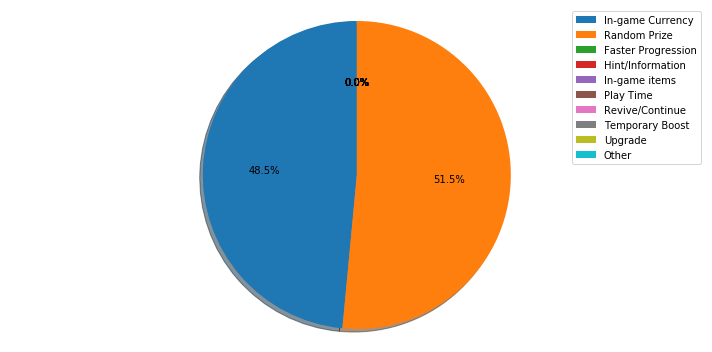

In [51]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(rv_rewards_cat[0], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(labels=rv_rewards_cat['If Rewarded? Type?'], loc='best')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
fig1.savefig('Rewarded_items_proportion.png', bbox_inches='tight')

# RV stacked 

In [52]:
rv_rewards_stacked = log_data.pivot_table(values='Nudge Time (HH:MM:SS)', index='Session Number', columns='AD Stacked Rewards (Y/N)', aggfunc='count').reset_index()
rv_rewards_stacked.columns = tuple(rv_rewards_stacked.columns)

In [53]:
rv_rewards_stacked['stacked_proportion'] = rv_rewards_stacked['y']/rv_rewards['All']

In [54]:
rv_rewards_stacked

,Session Number,y,stacked_proportion
0,1,6,0.230769
1,2,4,0.266667
2,3,7,0.538462
3,4,4,0.400000
4,5,5,0.333333
5,6,5,0.555556


In [55]:
rv_rewards_stacked_average = rv_rewards_stacked.mean()['stacked_proportion']

if rv_rewards_stacked_average < 0.5:
    recommended_stacking_rewards = 'You can stacked more RV ads to double rewards!'

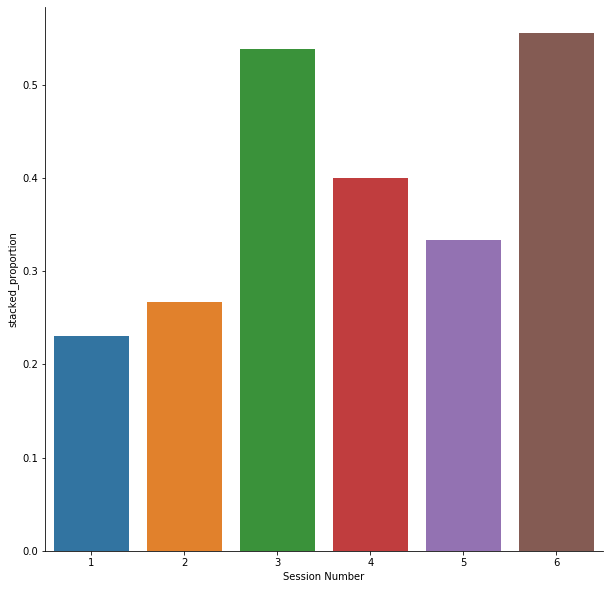

In [56]:
fig, ax1 = plt.subplots(figsize=(10, 10))
sns.barplot(x='Session Number', y='stacked_proportion', data=rv_rewards_stacked, ax=ax1)
sns.despine(fig)
fig.savefig('Rewards_stacked_through_game_play.png', bbox_inches='tight')

# Time-based Patterns 

In [57]:
log_data.columns

Index(['Analyst ID', 'Name', 'Phone Model', 'Location', 'VPN?',
       'Session Number', 'Date (D/M/Y)', 'Session Duration', 'Game',
       'Nudge Time (HH:MM:SS)', 'Start Type', 'Location in game', 'Game Push',
       'Gift', 'What is Gifted', 'Gift Stacked reward', 'IAP Type',
       'IAP Purchased With?', 'What was for sale?', 'Did you Purchase?',
       'IAP Stacked reward', 'AD Format:', 'AD type', 'Watched ',
       'If Rewarded? Type?', 'AD Stacked Rewards (Y/N)', 'Advertiser',
       'Notes/Comments', 'Link to Recording'],
      dtype='object')

In [58]:
log_data['Nudge Time (HH:MM:SS)'] = pd.to_timedelta(log_data['Nudge Time (HH:MM:SS)'].astype(str))
# log_data = log_data.set_index('Nudge Time (HH:MM:SS)')

In [59]:
min_session_duration = int(min(log_data['Session Duration'])/60)

In [60]:
log_data = log_data[log_data['Nudge Time (HH:MM:SS)'] <= pd.to_timedelta(min(log_data['Session Duration']), unit='s')]
log_data.shape

(264, 29)

In [61]:
nudge_bins = []
nudge_bins_cat = list(range(0, min_session_duration))
for i in range(min_session_duration + 1):
    nudge_bins.append(pd.to_timedelta(i, unit='m'))
log_data['nudge_mins'] = pd.cut(log_data['Nudge Time (HH:MM:SS)'], nudge_bins, labels=nudge_bins_cat)

## Ad Proactiveness Pattern

In [62]:
proactiveness_pattern = log_data.groupby(['nudge_mins', 'Start Type']).size().reset_index().rename(columns={0:'freq'})
# proactiveness_pattern 

In [63]:
proactiveness_pattern

,nudge_mins,Start Type,freq
0,0,Game Initiated,6
1,0,Player Initiated,6
2,1,Game Initiated,5
3,1,Player Initiated,7
4,2,Game Initiated,5
5,2,Player Initiated,7
6,3,Game Initiated,7
7,3,Player Initiated,5
8,4,Game Initiated,4
9,4,Player Initiated,6


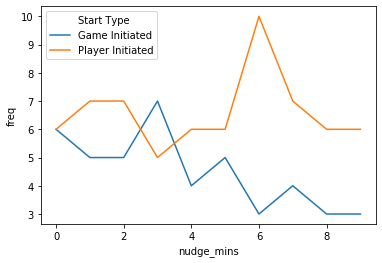

In [64]:
ax = sns.lineplot(x="nudge_mins", y="freq", hue="Start Type",
                  data=proactiveness_pattern)
ax.figure.savefig('Ad_proactiveness_across_average_game_duration.png', bbox_inches='tight')

## Ad Placement Pattern

In [65]:
game_location_pattern = log_data[log_data['AD Format:'].notnull()]
game_location_pattern = game_location_pattern.groupby(['nudge_mins', 'Location in game']).size().reset_index().rename(columns={0:'freq'})
# game_location_pattern

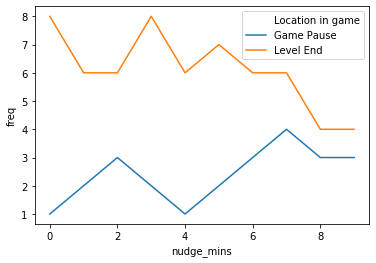

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.lineplot(x="nudge_mins", y="freq", hue="Location in game",
                  data=game_location_pattern)
ax.figure.savefig('Ad_location_across_average_game_duration.png', bbox_inches='tight')

In [67]:
game_location_pattern

,nudge_mins,Location in game,freq
0,0,Game Pause,1
1,0,Level End,8
2,1,Game Pause,2
3,1,Level End,6
4,2,Game Pause,3
5,2,Level End,6
6,3,Game Pause,2
7,3,Level End,8
8,4,Game Pause,1
9,4,Level End,6


In [68]:
if np.std(game_location_pattern['freq']) > 1:
    recommended_ad_consistency = "Game Ads can display more consistently on a high frequency!"

## Ad Type Pattern

In [69]:
ad_type_pattern = log_data.groupby(['nudge_mins', 'AD type']).size().reset_index().rename(columns={0:'freq'})
# ad_type_pattern

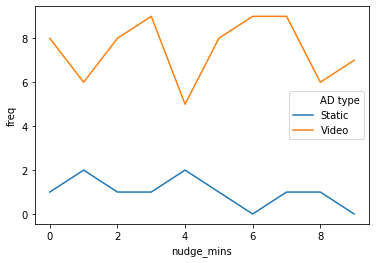

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.lineplot(x="nudge_mins", y="freq", hue="AD type",
                  data=ad_type_pattern)
ax.figure.savefig('Ad_type_across_average_game_duration.png', bbox_inches='tight')

## Ad Format Pattern

In [71]:
ad_format_pattern = log_data.groupby(['nudge_mins', 'AD Format:']).size().reset_index().rename(columns={0:'freq'})
# ad_format_pattern

In [72]:
#nudges per mins
#graph out all the sessions and get the moving averarge and the change in nudge density over the course of the gameplay

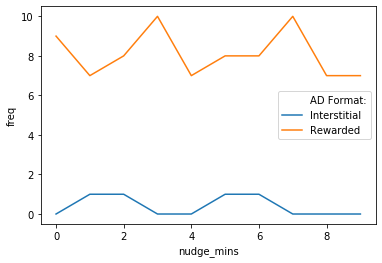

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.lineplot(x="nudge_mins", y="freq", hue="AD Format:",
                  data=ad_format_pattern)
ax.figure.savefig('Ad_category_across_average_game_duration.png', bbox_inches='tight')

## Ad Format Cat 

In [74]:
ad_cols

['Banner', 'Interstitial', 'Rewarded']

In [75]:
ad_format_pattern_cat = ad_format_pattern.groupby(['AD Format:']).sum().reset_index().rename(columns={0:'freq'})

for i in ad_cols:
    if i not in ad_format_pattern_cat['AD Format:'].values:
        ad_format_pattern_cat = ad_format_pattern_cat.append({'AD Format:': i, 'freq':0}, ignore_index=True)
ad_format_pattern_cat

,AD Format:,freq
0,Interstitial,4
1,Rewarded,81
2,Banner,0


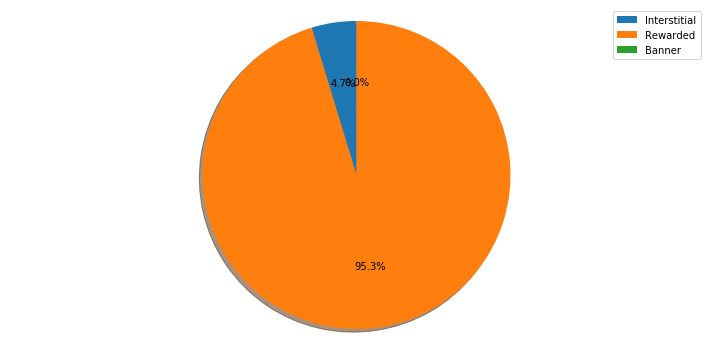

In [76]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(ad_format_pattern_cat['freq'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(labels=ad_format_pattern_cat['AD Format:'], loc='best')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
fig1.savefig('Ad_category_in_game.png', bbox_inches='tight')

## Ad Reward Stacked Pattern

In [77]:
stacked_pattern = log_data.groupby(['nudge_mins', 'AD Stacked Rewards (Y/N)']).size().reset_index().rename(columns={0:'y_freq'})
ad_format_pattern_rewarded = ad_format_pattern[ad_format_pattern['AD Format:'] == 'Rewarded']
stacked_pattern['total'] = ad_format_pattern.groupby('nudge_mins')['freq'].sum()
stacked_pattern['n_freq'] = stacked_pattern['total'] - stacked_pattern['y_freq']
stacked_pattern

,nudge_mins,AD Stacked Rewards (Y/N),y_freq,total,n_freq
0,0,y,2,9,7
1,1,y,3,8,5
2,2,y,3,9,6
3,3,y,2,10,8
4,4,y,2,7,5
5,5,y,4,9,5
6,6,y,3,9,6
7,7,y,4,10,6
8,8,y,2,7,5
9,9,y,3,7,4


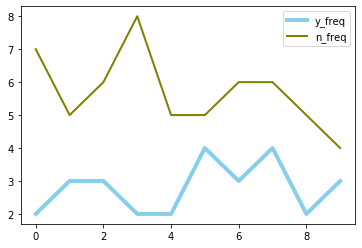

In [78]:
# multiple line plot
ax = plt.plot( 'nudge_mins', 'y_freq', data=stacked_pattern, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
ax = plt.plot( 'nudge_mins', 'n_freq', data=stacked_pattern, color='olive', linewidth=2)
ax = plt.legend()
ax.figure.savefig('Ad_stacked_rewards_across_average_game_duration.png', bbox_inches='tight')

# Undesirable Ad Patterns

In [79]:
anti_ad_patterns = 0
max_level = 0

In [80]:
#Get all the anti-ad patterns

In [81]:
max_level += 1
if ad_placement_cat[ad_placement_cat['Location in game'] != 'Game Play'].sum()['Banner'] > 0:
    anti_ad_patterns += 1

In [82]:
max_level += 1
if str(time_to_first_ad) < '00:00:05':
    anti_ad_patterns += 1

In [83]:
anti_ad_patterns/max_level

0.0

# Desirable Ad Patterns 

## Daily reward when open game

In [84]:
game_location_cols

['AD',
 'App Start',
 'Death/Mission',
 'Game Pause',
 'Game Play',
 'Game Store',
 'Level End',
 'Load Screen',
 'Menu',
 'Other']

In [85]:
if ad_placement_cat[ad_placement_cat['Location in game'] == 'App Start']['Rewarded'].values > 0:
    print('Desired Ad Achieved: Daily reward when open game')
else:
    recommended_desire1 = "You can create and gift daily reward to gamers when they return to the game! This helps with retention rate by rewarding users to return to the game on a daily basis."
recommended_desire1

'You can create and gift daily reward to gamers when they return to the game! This helps with retention rate by rewarding users to return to the game on a daily basis.'

## RV to double reward

In [86]:
if rv_rewards_stacked['y'].sum():
    print('Desired Ad Achieved: RV to double reward')
else:
    recommended_desire2 = "When the Level completes, add RV to double the rewards!"

Desired Ad Achieved: RV to double reward


## RV for Hint

In [87]:
if rv_rewards_cat[rv_rewards_cat['If Rewarded? Type?'] == 'Hint/Information'][0].values > 0:
    print('Desired Ad Achieved: RV for hint')
else:
    recommended_desire3 = "You can add RV to give gamers' hint in the game! This  \
players to progress more rapidly through the game and drives \
higher retention." 

## RV for level end

In [88]:
if ad_placement_cat[ad_placement_cat['Location in game'] == 'Level End']['Rewarded'].values > 0:
    print('Desired Ad Achieved: RV to reach level end')
else:
    recommended_desire4 = "After every level use an option to get double coins by seeing a RV or Interstitial Ads! "

Desired Ad Achieved: RV to reach level end


## RV to continue

In [89]:
if ad_placement_cat[ad_placement_cat['Location in game'] == 'Death/Mission']['Rewarded'].values > 0:
    print('Desired Ad Achieved: RV to continue')
else:
    recommended_desire5 = "Let players see a RV and continue every time they fail! Allow them to resume playing from the same place."

## RV for resource

In [90]:
if rv_rewards_cat[rv_rewards_cat['If Rewarded? Type?'] == 'In-game items'][0].values > 0:
    print('Desired Ad Achieved: RV to get resource when out of resource')
else:
    recommended_desire6 = "Please add an option to see a RV to get more items!"

## RV to skip level 

In [91]:
if rv_rewards_cat[rv_rewards_cat['If Rewarded? Type?'] == 'Faster Progression'][0].values > 0:
    print('Desired Ad Achieved: RV to get skip level')
else:
    recommended_desire7 = "Please add an option to watch an ad to skip to the next level of the game. Currently the levels are unlocked by winning the previous level. But you can add the option for player to see an Ad to skip."

## RV to get more time 

In [92]:
if rv_rewards_cat[rv_rewards_cat['If Rewarded? Type?'] == 'Play Time'][0].values > 0:
    print('Desired Ad Achieved: RV to get more time')
else:
    recommended_desire8 = 'You can add RV to reward gamers more game time!'

## RV Interstitial Ads Recommendation

In [93]:
recommended_desire9 = "The optimal display interval for interstitial differs from game to game, we recommend A/B testing the optimal display interval \
for " + str(game) + " starting with 120 seconds / interstitial, then \
decreasing it by gradually using dynamic server side \
parameters while monitoring retention. Keep reducing the \
display interval by 15-30 seconds as long as retention doesn't \
decrease to achieve optimal revenue with the best player \
experience."

# Ad Design Score

In [94]:
nudge_stats

,Session Number,Start Type,AD Format:,Interstitial,Rewarded,Static,Video,Session Duration,Game Initiated,Player Initiated,...,Banner,Banner_Game Initiated,Ad velocity,Banner velocity,Interstitial velocity,Rewarded velocity,Ad proactiveness,Banner proactiveness,Interstitial proactiveness,Rewarded proactiveness
0,1.000000,27.000000,26.00000,NaN,26.000000,12.0,14.000000,00:11:37,20.000000,6.000000,...,NaN,NaN,00:00:26.807692,0 days,00:00:00,00:00:26.807692,0.769231,NaN,NaN,0.769231
1,2.000000,21.000000,15.00000,NaN,15.000000,NaN,15.000000,00:12:02,8.000000,7.000000,...,NaN,NaN,00:00:48.133333,0 days,00:00:00,00:00:48.133333,0.533333,NaN,NaN,0.533333
2,3.000000,20.000000,13.00000,NaN,13.000000,NaN,13.000000,00:10:07,6.000000,7.000000,...,NaN,NaN,00:00:46.692307,0 days,00:00:00,00:00:46.692307,0.461538,NaN,NaN,0.461538
3,4.000000,19.000000,11.00000,1.000000,10.000000,NaN,11.000000,00:11:25,7.000000,4.000000,...,NaN,NaN,00:01:02.272727,0 days,00:11:25,00:01:08.500000,0.636364,NaN,1.0,0.600000
4,5.000000,18.000000,16.00000,1.000000,15.000000,NaN,16.000000,00:10:19,2.000000,14.000000,...,NaN,NaN,00:00:38.687500,0 days,00:10:19,00:00:41.266666,0.125000,NaN,1.0,0.066667
5,6.000000,17.000000,12.00000,3.000000,9.000000,NaN,12.000000,00:11:30,7.000000,5.000000,...,NaN,NaN,00:00:57.500000,0 days,00:03:50,00:01:16.666666,0.583333,NaN,1.0,0.444444
average,3.500000,20.333333,15.50000,1.666667,14.666667,12.0,13.500000,00:11:10,8.333333,7.166667,...,NaN,NaN,00:00:46.682260,0 days,00:04:15.666666,00:00:51.344444,0.518133,NaN,1.0,0.479202
variety,1.707825,3.248931,4.99166,0.942809,5.557777,0.0,1.707825,00:00:42.087211,5.557777,3.236081,...,NaN,NaN,00:00:11.698336,0 days,00:04:52.430428,00:00:16.688795,0.199694,NaN,0.0,0.213442


In [95]:
nudge_stats.columns

Index(['Session Number', 'Start Type', 'AD Format:', 'Interstitial',
       'Rewarded', 'Static', 'Video', 'Session Duration', 'Game Initiated',
       'Player Initiated', 'Rewarded_Game Initiated',
       'Rewarded_Player Initiated', 'Interstitial_Game Initiated', 'Banner',
       'Banner_Game Initiated', 'Ad velocity', 'Banner velocity',
       'Interstitial velocity', 'Rewarded velocity', 'Ad proactiveness',
       'Banner proactiveness', 'Interstitial proactiveness',
       'Rewarded proactiveness'],
      dtype='object')

In [96]:
ad_metrics_averages1 = nudge_stats[['Ad velocity', 'Banner velocity',
       'Interstitial velocity', 'Rewarded velocity']].loc['average'].reset_index().rename(columns={'index':'metrics', 'average':'averages'})
ad_metrics_averages1['averages'] = ad_metrics_averages1['averages'].dt.total_seconds()
ad_metrics_averages1

,metrics,averages
0,Ad velocity,46.682260
1,Banner velocity,0.000000
2,Interstitial velocity,255.666667
3,Rewarded velocity,51.344444


In [97]:
ad_metrics_averages2 = nudge_stats[['AD Format:', 'Banner', 'Interstitial',
       'Rewarded', 'Ad proactiveness',
       'Banner proactiveness', 'Interstitial proactiveness',
       'Rewarded proactiveness']].loc['average'].reset_index().rename(columns={'index':'metrics', 'average':'averages'})
ad_metrics_averages2

,metrics,averages
0,AD Format:,15.500000
1,Banner,NaN
2,Interstitial,1.666667
3,Rewarded,14.666667
4,Ad proactiveness,0.518133
5,Banner proactiveness,NaN
6,Interstitial proactiveness,1.000000
7,Rewarded proactiveness,0.479202


In [98]:
ad_metrics_averages3 = {'ad_variety_score':ad_variety_score,
                  'ad_placement_variety_score':ad_placement_variety_score,
                  'rv_rewards_stacked_average':rv_rewards_stacked_average}
ad_metrics_averages3 = pd.DataFrame(ad_metrics_averages3.items()).rename(columns={0:'metrics', 1:'averages'})
ad_metrics_averages3

,metrics,averages
0,ad_variety_score,0.666667
1,ad_placement_variety_score,0.200000
2,rv_rewards_stacked_average,0.387464


In [99]:
ad_metrics_averages4 = {'time_to_first_ad':time_to_first_ad,
                        'time_to_first_banner':time_to_first_banner,
                        'time_to_first_interstitial':time_to_first_interstitial,
                        'time_to_first_rewarded':time_to_first_rewarded}
ad_metrics_averages4 = pd.DataFrame(ad_metrics_averages4.items()).rename(columns={0:'metrics', 1:'averages'})
ad_metrics_averages4['averages'] = pd.to_timedelta(ad_metrics_averages4['averages'].astype(str)).dt.total_seconds()
ad_metrics_averages4

,metrics,averages
0,time_to_first_ad,32.0
1,time_to_first_banner,NaN
2,time_to_first_interstitial,393.0
3,time_to_first_rewarded,32.0


In [100]:
ad_metrics_averages = pd.concat([ad_metrics_averages1, ad_metrics_averages2, ad_metrics_averages3, ad_metrics_averages4], ignore_index=True)
ad_metrics_averages

,metrics,averages
0,Ad velocity,46.682260
1,Banner velocity,0.000000
2,Interstitial velocity,255.666667
3,Rewarded velocity,51.344444
4,AD Format:,15.500000
5,Banner,NaN
6,Interstitial,1.666667
7,Rewarded,14.666667
8,Ad proactiveness,0.518133
9,Banner proactiveness,NaN


In [101]:
sme_metrics = {'sme_ad_velocity_ad':sme_ad_velocity_ad,
              'sme_banner_velocity_ad':sme_banner_velocity_ad,
              'sme_interstitial_velocity_ad':sme_interstitial_velocity_ad,
              'sme_rewarded_velocity_ad':sme_rewarded_velocity_ad,
               'sme_ad_occurence_ad':sme_ad_occurence_ad,
              'sme_banner_occurence_ad':sme_banner_occurence_ad,
              'sme_interstitial_occurence_ad':sme_interstitial_occurence_ad,
              'sme_rewarded_occurence_ad':sme_rewarded_occurence_ad,
              'sme_ad_proactiveness_ad':sme_ad_proactiveness_ad,
              'sme_banner_proactiveness_ad':sme_banner_proactiveness_ad,
              'sme_interstitial_proactiveness_ad':sme_interstitial_proactiveness_ad,
              'sme_rewarded_proactiveness_ad':sme_rewarded_proactiveness_ad,
              'sme_ad_variety_score_ad':sme_ad_variety_score_ad,
              'sme_ad_placement_variety_score_ad':sme_ad_placement_variety_score_ad,
              'sme_rv_rewards_stacked_ad':sme_rv_rewards_stacked_ad,
              'sme_time_to_first_ad_ad':sme_time_to_first_ad_ad,
              'sme_time_to_first_banner_ad':sme_time_to_first_banner_ad,
              'sme_time_to_first_interstitial_ad':sme_time_to_first_interstitial_ad,
              'sme_time_to_first_rewarded_ad':sme_time_to_first_rewarded_ad}
sme_metrics = pd.DataFrame(sme_metrics.items()).rename(columns={0:'sme_metrics', 1:'sme'})
sme_metrics

,sme_metrics,sme
0,sme_ad_velocity_ad,30.0
1,sme_banner_velocity_ad,30.0
2,sme_interstitial_velocity_ad,30.0
3,sme_rewarded_velocity_ad,30.0
4,sme_ad_occurence_ad,20.0
5,sme_banner_occurence_ad,7.0
6,sme_interstitial_occurence_ad,7.0
7,sme_rewarded_occurence_ad,7.0
8,sme_ad_proactiveness_ad,0.5
9,sme_banner_proactiveness_ad,0.5


In [102]:
metrics_compare = pd.concat([ad_metrics_averages, sme_metrics.reindex(ad_metrics_averages.index)], axis=1)
metrics_compare['score'] = metrics_compare['averages']/metrics_compare['sme']
metrics_compare['score'] = (metrics_compare['score'].apply(lambda x: 1 if x > 1 else x)).fillna(0)
metrics_compare['shortfall'] = (1 - metrics_compare['score']).fillna(1)
metrics_compare['total'] = (metrics_compare['score'] + metrics_compare['shortfall']).fillna(1)
metrics_compare

,metrics,averages,sme_metrics,sme,score,shortfall,total
0,Ad velocity,46.682260,sme_ad_velocity_ad,30.0,1.000000,0.000000,1.0
1,Banner velocity,0.000000,sme_banner_velocity_ad,30.0,0.000000,1.000000,1.0
2,Interstitial velocity,255.666667,sme_interstitial_velocity_ad,30.0,1.000000,0.000000,1.0
3,Rewarded velocity,51.344444,sme_rewarded_velocity_ad,30.0,1.000000,0.000000,1.0
4,AD Format:,15.500000,sme_ad_occurence_ad,20.0,0.775000,0.225000,1.0
5,Banner,NaN,sme_banner_occurence_ad,7.0,0.000000,1.000000,1.0
6,Interstitial,1.666667,sme_interstitial_occurence_ad,7.0,0.238095,0.761905,1.0
7,Rewarded,14.666667,sme_rewarded_occurence_ad,7.0,1.000000,0.000000,1.0
8,Ad proactiveness,0.518133,sme_ad_proactiveness_ad,0.5,1.000000,0.000000,1.0
9,Banner proactiveness,NaN,sme_banner_proactiveness_ad,0.5,0.000000,1.000000,1.0


In [103]:
ad_design_score = metrics_compare['score'].mean()

if ad_design_score > 0.75:
    ad_design_evaluation = "Against our internal expert review, your ad design is superb. Keep up the good work. There are definitely still room for improvements"
elif ad_design_score > 0.6:
    ad_design_evaluation = "Against our internal expert review, your ad design is good. Keep it up! Take our recommendations and you'll see excellent improvements in your ad monetization!"
elif ad_design_score > 0.5:
    ad_design_evaluation = "Against our internal expert review, your ad design passed. You can do a lot to enhance your ad design and increase your revenue. Take our recommendations and you'll see excellent improvements in your ad monetization!"
else:
    ad_design_evaluation = "Against our internal expert review, your ad design have tremendous room for improvements. No worries as we are with you throughout! You can do a lot to enhance your ad design and increase your revenue. Take our recommendations and you'll see excellent improvements in your ad monetization!"
ad_design_evaluation   
#Give it A, B, C, D

"Against our internal expert review, your ad design is good. Keep it up! Take our recommendations and you'll see excellent improvements in your ad monetization!"

In [104]:
metrics_compare.columns

Index(['metrics', 'averages', 'sme_metrics', 'sme', 'score', 'shortfall',
       'total'],
      dtype='object')

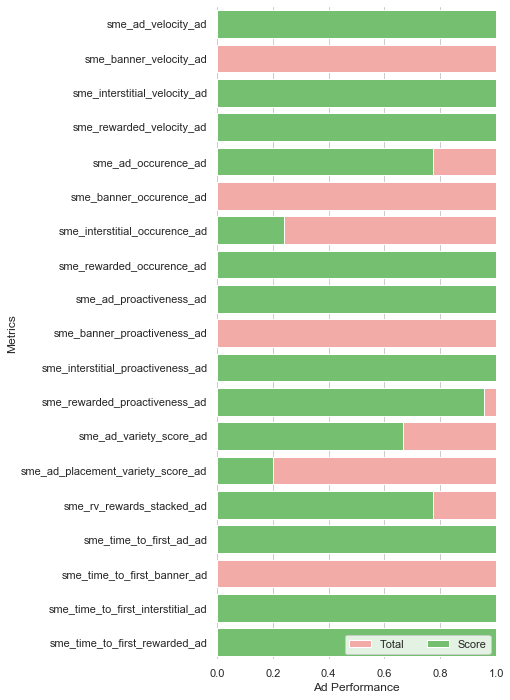

In [105]:
# #Set general plot properties
# sns.set_style("white")
# sns.set_context({"figure.figsize": (24, 10)})

# #Plot 1 - background - "total" (top) series
# sns.barplot(x = metrics_compare.metrics, y = metrics_compare.total, color = "red")

# #Plot 2 - overlay - "bottom" series
# bottom_plot = sns.barplot(x = metrics_compare.metrics, y = metrics_compare.score, color = "green")

# topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
# bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
# l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
# l.draw_frame(False)

# #Optional code - Make plot look nicer
# sns.despine(left=True)
# bottom_plot.set_ylabel("Y-axis label")
# bottom_plot.set_xlabel("X-axis label")

# #Set fonts to consistent 16pt size
# for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
#              bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#     item.set_fontsize(16)

#Set general plot properties
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 12))

# Plot the total maximum score possible
sns.set_color_codes("pastel")
sns.barplot(x="total", y="sme_metrics", data=metrics_compare,
            label="Total", color="r")

# Plot the score
sns.set_color_codes("muted")
sns.barplot(x="score", y="sme_metrics", data=metrics_compare,
            label="Score", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="Metrics",
       xlabel="Ad Performance")
sns.despine(left=True, bottom=True)
f.savefig('metrics_stacked.png', bbox_inches='tight')

# Extracting pictures from videos (Awaiting more Automation) 

In [106]:
import glob, os
videos = []
for video in glob.glob("*.mp4"):
    videos.append(video)
    
videos

['sol_s1_wordstack_15052020.mp4',
 'sol_s2_wordstack_20052020.mp4',
 'sol_s3_wordstack_20052020.mp4',
 'sol_s4_wordstack_20052020.mp4',
 'sol_s5_wordstack_23052020.mp4',
 'sol_s6_wordstack_23052020.mp4']

In [107]:
log_data['Location in game'].unique()

array(['App Start', 'Load Screen', 'Game Play', 'Level End', 'Menu',
       'Game Pause'], dtype=object)

In [108]:
min_session1 = min(log_data[log_data['Location in game'] == 'Load Screen']['Session Number'])
dt_nudge1 = log_data[(log_data['Location in game'] == 'Load Screen') & (log_data['Session Number'] == min_session1)]['Nudge Time (HH:MM:SS)'].iloc[0]
min_session1 = 's' + str(min_session1)
dt_nudge1 = dt_nudge1.total_seconds()*1000

min_session3 = min(log_data[log_data['Location in game'] == 'Menu']['Session Number'])
dt_nudge3 = log_data[(log_data['Location in game'] == 'Menu') & (log_data['Session Number'] == min_session3)]['Nudge Time (HH:MM:SS)'].iloc[0]
min_session3 = 's' + str(min_session3)
dt_nudge3 = dt_nudge3.total_seconds()*1000

min_session5 = min(log_data[log_data['Location in game'] == 'Level End']['Session Number'])
dt_nudge5 = log_data[(log_data['Location in game'] == 'Level End') & (log_data['Session Number'] == min_session5)]['Nudge Time (HH:MM:SS)'].iloc[0]
min_session5 = 's' + str(min_session5)
dt_nudge5 = dt_nudge5.total_seconds()*1000

min_session6 = min(log_data[log_data['Location in game'] == 'Game Pause']['Session Number'])
dt_nudge6 = log_data[(log_data['Location in game'] == 'Game Pause') & (log_data['Session Number'] == min_session6)]['Nudge Time (HH:MM:SS)'].iloc[0]
min_session6 = 's' + str(min_session6)
dt_nudge6 = dt_nudge6.total_seconds()*1000

min_session7 = min(log_data[log_data['Location in game'] == 'Level End']['Session Number'])
dt_nudge7 = log_data[(log_data['Location in game'] == 'Level End') & (log_data['Session Number'] == min_session7)]['Nudge Time (HH:MM:SS)'].iloc[-2]
min_session7 = 's' + str(min_session7)
dt_nudge7 = dt_nudge7.total_seconds()*1000

min_session8 = min(log_data[log_data['Location in game'] == 'Menu']['Session Number'])
dt_nudge8 = log_data[(log_data['Location in game'] == 'Menu') & (log_data['Session Number'] == min_session8)]['Nudge Time (HH:MM:SS)'].iloc[1]
min_session8 = 's' + str(min_session8)
dt_nudge8 = dt_nudge8.total_seconds()*1000

In [109]:
import cv2

os.chdir(r"C:\Users\User\Desktop\Fresh\Yodo1\Ad Design\Prototyping")

for video in videos:
    if min_session1 in video:    
        cam = cv2.VideoCapture(video)
        cam.set(cv2.CAP_PROP_POS_MSEC,dt_nudge1)  

        success, image = cam.read()

        if success:
            cv2.imwrite("open_game_reward.png", image)
            print('Success')
    
    if min_session3 in video:    
        cam = cv2.VideoCapture(video)
        cam.set(cv2.CAP_PROP_POS_MSEC,dt_nudge3)  

        success, image = cam.read()

        if success:
            cv2.imwrite("rv_hint.png", image)
            print('Success')
    
    if min_session5 in video:    
        cam = cv2.VideoCapture(video)
        cam.set(cv2.CAP_PROP_POS_MSEC,dt_nudge5)  

        success, image = cam.read()

        if success:
            cv2.imwrite("rv_continue.png", image)
            print('Success')

    if min_session6 in video:    
        cam = cv2.VideoCapture(video)
        cam.set(cv2.CAP_PROP_POS_MSEC,dt_nudge6)  

        success, image = cam.read()

        if success:
            cv2.imwrite("rv_resource.png", image)
            print('Success')

    if min_session7 in video:    
        cam = cv2.VideoCapture(video)
        cam.set(cv2.CAP_PROP_POS_MSEC,dt_nudge7)  

        success, image = cam.read()

        if success:
            cv2.imwrite("rv_skip_level.png", image)
            print('Success')
            
    if min_session8 in video:    
        cam = cv2.VideoCapture(video)
        cam.set(cv2.CAP_PROP_POS_MSEC,dt_nudge8)  

        success, image = cam.read()

        if success:
            cv2.imwrite("rv_more_time.png", image)
            print('Success')

Success
Success
Success
Success
Success
Success


# PDF Export 

In [110]:
ad_design_score = str(int(ad_design_score*100)) + '/100'
average_ad_velocity = str(timedelta(seconds=int(nudge_stats['Ad velocity']['average'].total_seconds())))
ad_placement_number = str(ad_placement['Location in game'].nunique()) + '/7'
ad_placement_locations = ad_placement['Location in game'].dropna().unique()
ad_format_number = str(log_data['AD Format:'].nunique()) + '/3'
ad_format_used = log_data['AD Format:'].dropna().unique()
time_to_first_ad = str(time_to_first_ad)
compliance = str(1 - anti_ad_patterns) + '/1'

In [111]:
separator = ', '
separator2 = ' and '
ad_placement_locations = separator.join(ad_placement_locations)
ad_format_used = separator.join(ad_format_used)

In [112]:
recommended_locations = list(set(game_location_cols) - set(ad_placement['Location in game'].unique()))
recommended_locations.remove('Other')
recommended_locations = separator.join(recommended_locations)

In [113]:
recommend_ads = list(set(ad_cols) - set(log_data['AD Format:'].unique()))
recommend_ads = separator.join(recommend_ads)
recommend_ads

'Banner'

In [114]:
current_ads = log_data['AD Format:'].dropna().unique()
if len(current_ads) == 2:
    current_ads = separator2.join(current_ads)
else:
    current_ads = separator.join(current_ads)
recommended_ads = "The current monetization model is heavily dependent on " + current_ads + "sds. The game has no " + recommend_ads + "ads. Thus, we recommend to inject some " + recommend_ads + " ads, which will increase the revenue and improve user experience, retention."
recommended_ads

'The current monetization model is heavily dependent on Rewarded and Interstitialsds. The game has no Bannerads. Thus, we recommend to inject some Banner ads, which will increase the revenue and improve user experience, retention.'

In [115]:
recommended_locations = list(set(game_location_cols) - set(ad_placement['Location in game'].unique()))
recommended_locations.remove('Other')
recommended_locations = separator.join(recommended_locations)

In [116]:
nudge_stats

,Session Number,Start Type,AD Format:,Interstitial,Rewarded,Static,Video,Session Duration,Game Initiated,Player Initiated,...,Banner,Banner_Game Initiated,Ad velocity,Banner velocity,Interstitial velocity,Rewarded velocity,Ad proactiveness,Banner proactiveness,Interstitial proactiveness,Rewarded proactiveness
0,1.000000,27.000000,26.00000,NaN,26.000000,12.0,14.000000,00:11:37,20.000000,6.000000,...,NaN,NaN,00:00:26.807692,0 days,00:00:00,00:00:26.807692,0.769231,NaN,NaN,0.769231
1,2.000000,21.000000,15.00000,NaN,15.000000,NaN,15.000000,00:12:02,8.000000,7.000000,...,NaN,NaN,00:00:48.133333,0 days,00:00:00,00:00:48.133333,0.533333,NaN,NaN,0.533333
2,3.000000,20.000000,13.00000,NaN,13.000000,NaN,13.000000,00:10:07,6.000000,7.000000,...,NaN,NaN,00:00:46.692307,0 days,00:00:00,00:00:46.692307,0.461538,NaN,NaN,0.461538
3,4.000000,19.000000,11.00000,1.000000,10.000000,NaN,11.000000,00:11:25,7.000000,4.000000,...,NaN,NaN,00:01:02.272727,0 days,00:11:25,00:01:08.500000,0.636364,NaN,1.0,0.600000
4,5.000000,18.000000,16.00000,1.000000,15.000000,NaN,16.000000,00:10:19,2.000000,14.000000,...,NaN,NaN,00:00:38.687500,0 days,00:10:19,00:00:41.266666,0.125000,NaN,1.0,0.066667
5,6.000000,17.000000,12.00000,3.000000,9.000000,NaN,12.000000,00:11:30,7.000000,5.000000,...,NaN,NaN,00:00:57.500000,0 days,00:03:50,00:01:16.666666,0.583333,NaN,1.0,0.444444
average,3.500000,20.333333,15.50000,1.666667,14.666667,12.0,13.500000,00:11:10,8.333333,7.166667,...,NaN,NaN,00:00:46.682260,0 days,00:04:15.666666,00:00:51.344444,0.518133,NaN,1.0,0.479202
variety,1.707825,3.248931,4.99166,0.942809,5.557777,0.0,1.707825,00:00:42.087211,5.557777,3.236081,...,NaN,NaN,00:00:11.698336,0 days,00:04:52.430428,00:00:16.688795,0.199694,NaN,0.0,0.213442


In [117]:
from pylab import title, figure, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF

pdf = FPDF(orientation='P', unit='pt', format='A4')
pdf.add_page()
# pdf.set_color(255,165,0)
pdf.image('Background.png', x = 0, y = 0, w = 600, h = 900)
pdf.image('MASlogo.png', x = 50, y = 50, w = 150, h = 100)
pdf.image('MASad.png', x = 380, y = 690, w = 200, h = 100)


y_axis = 150
pdf.set_y(y_axis)
pdf.set_font("Times", "B", 24)
pdf.cell(0, 80, str(game) + " Ad Design Report", 0, 1, "C")

pdf.set_font("Times", "B", 14)
pdf.cell(160, 25, "AD Design Score:")
pdf.set_font("Times", "", 12)
pdf.cell(0, 25, "{}".format(ad_design_score), 0, 1)

pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "B", 14)
pdf.cell(160, 25, "Average Ad Velocity:")
pdf.set_font("Times", "", 12)
pdf.cell(0, 25, "{}".format(average_ad_velocity), 0, 1)

pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "B", 14)
pdf.cell(160, 25, "Ad Placement:")
pdf.set_font("Times", "", 12)
pdf.cell(0, 25, "{}".format(ad_placement_number), 0, 1)

pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "B", 14)
pdf.cell(160, 25, "Ad Placement Locations:")
pdf.set_font("Times", "", 12)
pdf.cell(0, 25, "{}".format(ad_placement_locations), 0, 1)

pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "B", 14)
pdf.cell(160, 25, "Ad Format:")
pdf.set_font("Times", "", 12)
pdf.cell(0, 25, "{}".format(ad_format_number), 0, 1)

pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "B", 14)
pdf.cell(160, 25, "Ad Category Used:")
pdf.set_font("Times", "", 12)
pdf.cell(0, 25, "{}".format(ad_format_used), 0, 1)

pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "B", 14)
pdf.cell(160, 25, "Time to first Ad:")
pdf.set_font("Times", "", 12)
pdf.cell(0, 25, "{}".format(time_to_first_ad), 0, 1)

pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "B", 14)
pdf.cell(160, 25, "Compliance:")
pdf.set_font("Times", "", 12)
pdf.cell(0, 25, "{}".format(compliance), 0, 1)

pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "B", 14)
pdf.set_text_color(0, 0, 139)
pdf.cell(220, 25, "You can place ads at more locations:")
pdf.set_font("Times", "", 12)
pdf.set_text_color(0, 0, 0)
pdf.multi_cell(0, 25, "{}".format(recommended_locations), 0, 1)

pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "B", 14)
pdf.set_text_color(0, 0, 139)
pdf.cell(220, 25, "You can explore boosting your ad:")
pdf.set_font("Times", "", 12)
pdf.set_text_color(0, 0, 0)
pdf.multi_cell(0, 25, "{}".format(recommended_ads), 0, 1)



pdf.add_page()
count = 0
y_axis = 20

if count == 4:
    pdf.add_page()
    y_axis = 20
    
try:
    print(recommended_desire1)
    pdf.set_y(y_axis)
    count += 1
    pdf.set_font("Times", "B", 24)
    pdf.set_text_color(255, 140, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format("RECOMMENDATION " + str(count) + ":"), 0, 1, "L")
    pdf.set_font("Times", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format(recommended_desire1), 0, 1, "L")
    pdf.image('open_game_reward.png', x = 400, y = y_axis, w = 0, h = 150)
    y_axis +=200
except:
    pass

if count == 4:
    pdf.add_page()
    y_axis = 20

try:
    print(recommended_desire2)
    pdf.set_y(y_axis)
    count += 1
    pdf.set_font("Times", "B", 24)
    pdf.set_text_color(255, 140, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format("RECOMMENDATION " + str(count) + ":"), 0, 1, "L")
    pdf.set_font("Times", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format(recommended_desire2), 0, 1, "L")
    pdf.image('rv_double_reward.png', x = 400, y = y_axis, w = 0, h = 150)
    y_axis +=200
except:
    pass


if count == 4:
    pdf.add_page()
    y_axis = 20

try:
    print(recommended_desire3)
    pdf.set_y(y_axis)
    count += 1
    pdf.set_font("Times", "B", 24)
    pdf.set_text_color(255, 140, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format("RECOMMENDATION " + str(count) + ":"), 0, 1, "L")
    pdf.set_font("Times", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format(recommended_desire3), 0, 1, "L")
    pdf.image('rv_hint.png', x = 400, y = y_axis, w = 0, h = 150)
    y_axis +=200
except:
    pass

if count == 4:
    pdf.add_page()
    y_axis = 20
    
try:
    print(recommended_desire4)
    pdf.set_y(y_axis)
    count += 1
    pdf.set_font("Times", "B", 24)
    pdf.set_text_color(255, 140, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format("RECOMMENDATION " + str(count) + ":"), 0, 1, "L")
    pdf.set_font("Times", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format(recommended_desire4), 0, 1, "L")
    pdf.image('rv_level_end.png', x = 400, y = y_axis, w = 0, h = 150)
    y_axis +=200
except:
    pass

if count == 4:
    pdf.add_page()
    y_axis = 20

try:
    print(recommended_desire5)
    pdf.set_y(y_axis)
    count += 1
    pdf.set_font("Times", "B", 24)
    pdf.set_text_color(255, 140, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format("RECOMMENDATION " + str(count) + ":"), 0, 1, "L")
    pdf.set_font("Times", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format(recommended_desire5), 0, 1, "L")
    pdf.image('rv_continue.png', x = 400, y = y_axis, w = 0, h = 150)
    y_axis +=200
except:
    pass

if count == 4:
    pdf.add_page()
    y_axis = 20

try:
    print(recommended_desire6)
    pdf.set_y(y_axis)
    count += 1
    pdf.set_font("Times", "B", 24)
    pdf.set_text_color(255, 140, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format("RECOMMENDATION " + str(count) + ":"), 0, 1, "L")
    pdf.set_font("Times", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format(recommended_desire6), 0, 1, "L")
    pdf.image('rv_resource.png', x = 400, y = y_axis, w = 0, h = 150)
    y_axis +=200
except:
    pass

if count == 4:
    pdf.add_page()
    y_axis = 20

try:
    print(recommended_desire7)
    pdf.set_y(y_axis)
    count += 1
    pdf.set_font("Times", "B", 24)
    pdf.set_text_color(255, 140, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format("RECOMMENDATION " + str(count) + ":"), 0, 1, "L")
    pdf.set_font("Times", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format(recommended_desire7), 0, 1, "L")
    pdf.image('rv_skip_level.png', x = 400, y = y_axis, w = 0, h = 150)
    y_axis +=200
except:
    pass

if count == 4:
    pdf.add_page()
    y_axis = 20

try:
    print(recommended_desire8)
    pdf.set_y(y_axis)
    count += 1
    pdf.set_font("Times", "B", 24)
    pdf.set_text_color(255, 140, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format("RECOMMENDATION " + str(count) + ":"), 0, 1, "L")
    pdf.set_font("Times", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format(recommended_desire8), 0, 1, "L")
    pdf.image('rv_more_time.png', x = 400, y = y_axis, w = 0, h = 150)
    y_axis +=200
except:
    pass

if count == 8:
    pdf.add_page()
    y_axis = 20

try:
    print(recommended_desire9)
    pdf.set_y(y_axis)
    count += 1
    pdf.set_font("Times", "B", 24)
    pdf.set_text_color(255, 140, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format("RECOMMENDATION " + str(count) + ":"), 0, 1, "L")
    pdf.set_font("Times", "", 12)
    pdf.set_text_color(0, 0, 0)
    pdf.cell(0, 20, "", 0, 1)
    pdf.multi_cell(300, 20, "{}".format(recommended_desire9), 0, 1, "L")
    
    pdf.set_x(370)
    pdf.set_font("Times", "I", 12)
    pdf.multi_cell(200, 10, "Current Ads Velocities", 0, 0, "J")
    pdf.image('Average_ad_velocity.png', x = 350, y = y_axis + 50, w = 0, h = 150)

    y_axis +=200
except:
    pass



pdf.add_page()
###Ad Statistics
pdf.set_font("Times", "B", 24)
pdf.cell(0, 50, "Some Simple Current Game Ad Statistics", 0, 1, "C")

y_axis= 100
pdf.set_y(y_axis)

# # 1 set of charts
# pdf.set_font("Times", "I", 13)
# pdf.cell(175, 0, "Ad occurence per 10mins", 0, 0, "C")
# pdf.cell(175, 0, "Current Ads pushed by Game", 0, 0, "C")
# pdf.cell(175, 0, "Current Ads shown in Game", 0, 0, "C")
# pdf.image('Ad_average_count.png', x = 30, y = y_axis + 20, w = 0, h = 150)

# pdf.cell(0, 5, "", 0, 1)
# pdf.image('Ad_average_proactiveness.png', x = 205, y = y_axis + 20, w = 0, h = 150)

# ##pie charts
# pdf.cell(0, 5, "", 0, 1)
# pdf.image('Ad_category_in_game.png', x = 380, y = y_axis + 70, w = 150, h = 0)

# y_axis= y_axis + 230
# pdf.set_y(y_axis)
# 1 set of charts
# pdf.set_font("Times", "I", 13)
# pdf.cell(175, 0, "Current Ads placement locations", 0, 0, "C")
# pdf.cell(175, 0, "Current Ads types shown in Game", 0, 0, "C")
# pdf.cell(175, 0, "Current Ads types breakdown", 0, 0, "C")
# ##pie charts
# pdf.image('Ad_placement_location_proportion.png', x = 30, y = y_axis + 70, w = 150, h = 0)

# pdf.cell(0, 5, "", 0, 1)
# pdf.image('Ad_type_average_count.png', x = 205, y = y_axis + 20, w = 0, h = 150)

# ##pie charts
# pdf.cell(0, 5, "", 0, 1)
# pdf.image('ad_type_by_ad_format_distribution_table.png', x = 390, y = y_axis + 70, w = 150, h = 0)

# y_axis= y_axis + 230
# pdf.set_y(y_axis)
# # 1 set of charts
pdf.set_font("Times", "I", 13)
# pdf.cell(175, 10, "Current Ads velocities", 0, 0, "C")
pdf.cell(175, 10, "Current Ads proactiveness across time", 0, 0, "C")
##pie charts
# pdf.image('Average_ad_velocity.png', x = 30, y = y_axis + 20, w = 0, h = 150)

pdf.cell(0, 5, "", 0, 1)
pdf.image('Ad_proactiveness_across_average_game_duration.png', x = 30, y = y_axis + 20, w = 150, h = 0)


# y_axis= y_axis 
pdf.set_y(y_axis + 40)
pdf.set_x(200)
pdf.set_font("Times", "B", 12)
pdf.set_text_color(255, 0, 0)
pdf.multi_cell(300, 20, "{}".format(recommendated_ads_tightness), 0, 1, "C")



# pdf.add_page()
# 1 set of charts
y_axis= y_axis + 180
pdf.set_y(y_axis)
pdf.cell(0, 5, "", 0, 1)
pdf.set_font("Times", "I", 13)
pdf.set_text_color(0, 0, 0)
pdf.cell(175, 0, "Current Ads shown across game", 0, 0, "C")
pdf.cell(175, 0, "Current Ads location across game", 0, 0, "C")
pdf.cell(215, 0, "Current Ads type across game", 0, 0, "C")
##pie charts
pdf.image('Ad_category_across_average_game_duration.png', x = 30, y = y_axis + 20, w = 150, h = 0)

pdf.cell(0, 5, "", 0, 1)
pdf.image('Ad_location_across_average_game_duration.png', x = 205, y = y_axis + 20, w = 150, h = 0)

##table charts
pdf.cell(0, 5, "", 0, 1)
pdf.image('Ad_type_across_average_game_duration.png', x = 400, y = y_axis + 20, w = 150, h = 0)


y_axis= y_axis + 180
pdf.set_y(y_axis)
pdf.set_font("Times", "B", 12)
pdf.set_text_color(255, 0, 0)
pdf.cell(550, 20, "{}".format(recommended_ad_consistency), 0, 1, "C")


# y_axis= 210
# pdf.set_y(y_axis)
# # 1 set of charts
# pdf.cell(0, 5, "", 0, 1)
# pdf.set_font("Times", "I", 13)
# pdf.cell(250, 0, "Interstitial placement breakdown", 0, 0, "C")
# pdf.cell(250, 0, "Rewarded placement breakdown", 0, 0, "C")
# ##pie charts
# pdf.image('Interstitial_ad_placement_location_proportion.png', x = 40, y = y_axis+20, w = 225, h = 0)

# pdf.cell(0, 5, "", 0, 1)
# pdf.image('Rewarded_ad_placement_location_proportion.png', x = 290, y = y_axis+20, w = 225, h = 0)


y_axis= y_axis + 100
pdf.set_y(y_axis)
# 1 set of charts
pdf.cell(0, 5, "", 0, 1)
pdf.set_text_color(0, 0, 0)
pdf.set_font("Times", "I", 13)
pdf.cell(175, 0, "Rewarded items breakdown", 0, 0, "C")
pdf.cell(175, 0, "Stacking of Rewards", 0, 0, "C")
pdf.cell(175, 0, "Rewards stacking across game", 0, 0, "C")
##pie charts
pdf.image('Rewarded_items_proportion.png', x = 20, y = y_axis + 70, w = 150, h = 0)

pdf.cell(0, 5, "", 0, 1)
pdf.image('Rewards_stacked_through_game_play.png', x = 205, y = y_axis + 20, w = 0, h = 150)

pdf.cell(0, 5, "", 0, 1)
pdf.image('Ad_stacked_rewards_across_average_game_duration.png', x = 380, y = y_axis + 70, w = 150, h = 0)


y_axis= y_axis + 180
pdf.set_y(y_axis)
# pdf.set_x(100)
pdf.set_font("Times", "B", 12)
pdf.set_text_color(255, 0, 0)
pdf.cell(550, 20, "{}".format(recommended_more_rewards), 0, 1, "C")
pdf.cell(550, 20, "{}".format(recommended_stacking_rewards), 0, 1, "C")



pdf.add_page()
y_axis= 40
pdf.set_y(y_axis)
pdf.cell(0, 5, "", 0, 1)
pdf.image('metrics_stacked.png', x = 20, y = y_axis + 20, w = 250, h = 0)

y_axis= 150
pdf.set_y(y_axis)
pdf.set_x(300)
pdf.set_font("Times", "B", 14)
pdf.cell(175, 0, "Overall Metrics and Summary", 0, 0, "C")
pdf.cell(0, 10, "", 0, 1)
pdf.set_text_color(0, 0, 0)
y_axis= 200
pdf.set_y(y_axis)
pdf.set_x(300)
pdf.multi_cell(225, 20, "{}".format(ad_design_evaluation), 0, 1, "C")

y_axis= 500
pdf.set_y(y_axis)
pdf.cell(400, 30, "Contact your friendly MAS BD/CS Manager right now!", 0, 0, "L")
pdf.cell(0, 20, "", 0, 1)
pdf.cell(400, 30, "Try out more of our MAS services such as:", 0, 0, "L")
pdf.image('bd.png', x = 400, y = y_axis + 10, w = 50, h = 50)
pdf.image('cs.png', x = 500, y = y_axis + 10, w = 50, h = 50)

pdf.output('ad_design_report_v1.pdf', 'F')

You can create and gift daily reward to gamers when they return to the game! This helps with retention rate by rewarding users to return to the game on a daily basis.
You can add RV to give gamers' hint in the game! This  players to progress more rapidly through the game and drives higher retention.
Let players see a RV and continue every time they fail! Allow them to resume playing from the same place.
Please add an option to see a RV to get more items!
Please add an option to watch an ad to skip to the next level of the game. Currently the levels are unlocked by winning the previous level. But you can add the option for player to see an Ad to skip.
You can add RV to reward gamers more game time!
The optimal display interval for interstitial differs from game to game, we recommend A/B testing the optimal display interval for Word Stack starting with 120 seconds / interstitial, then decreasing it by gradually using dynamic server side parameters while monitoring retention. Keep reducin

''